#4-1. 로지스틱 회귀

In [3]:
import pandas as pd
fish = pd.read_csv('https://bit.ly//fish_csv')
fish.head() #처음 5개 행 출력

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [4]:
print(pd.unique(fish['Species'])) #unique()함수는 고유한 값 추출

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [5]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height','Width']].to_numpy()

- 데이터프레임에서 여러 열을 선택하면 새로운 데이터프레임이 반환되므로 이를 to_numpy() 메서드를 사용해서 넘파이 배열로 바꾼다.

In [6]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [7]:
fish_target = fish['Species'].to_numpy()

In [8]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state= 42)

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- 다중 분류: 타깃 데이터에 2개 이상 클래스가 포함된 문제

In [11]:
print(kn.classes_) #사이킷런 모델에 전달하여 알파벳 순으로 매겨진 타깃값

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [12]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [13]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


- predict_proba() :클래스별 확률값을 반환, 출력 순서는 classes_와 동일
- round(): 반올림하는데 dicimals 매개변수로 자릿수 지정 가능

In [14]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


##로지스틱 회귀
: 분류모델, 선형회귀와 동일하게 선형방정식을 학습

- 시그모이드 함수(로지스틱 함수)를 사용한다.

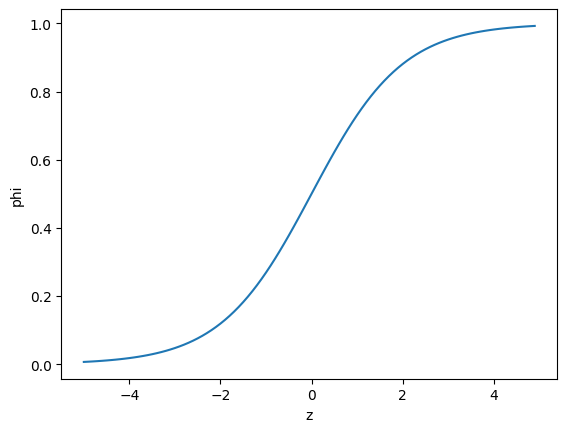

In [15]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

- 지수 함수 계산은 np.exp() 함수를 사용한다.

###로지스틱 회귀로 이진 분류

In [16]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


- 불리언 인덱싱: True, False 값을 전달

In [17]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

- 도미와 빙어 데이터만 골라낸다.

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [19]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [20]:
print(lr.classes_)

['Bream' 'Smelt']


In [21]:
print(lr.coef_, lr.intercept_)

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


In [22]:
decisions = lr.decision_function(train_bream_smelt[:5]) #decision_function()는 양성 클래스에 대한 z값 계산
print(decisions)

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


In [23]:
from scipy.special import expit
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


- 사이파이 라이브러리에도 시그모이드 함수가 있는데 expit()으로 np.exp() 함수를 이용해서 계산하는 것 보다 편리하다.
- 출력된 값은 predict_proba() 메서드 출력의 두 번째 열의 값과 동일하다. 즉, dicision_function() 메서드는 양성클래스에 대한 z값을 반환한다.

###로지스틱 회귀로 다중 분류

In [24]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


- LogisticRegression에서 규제를 제어하는 매개변수는 C이다.
- 매개변수 c는 alpha와 반대로 alpha값이 작을수록 규제가 커진다.
- C의 기본값은 1이다.

In [25]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [28]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [29]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [33]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


- 다중 분류는 소프트 맥스 함수를 사용하여 7개의 z값을 확률로 변환한다.
- 소프트 맥수 함수: 여러 개의 선형 방정식의 출력값을 0~1사이로 압축하고 전체 합이 1이 되도록 만든다.
- 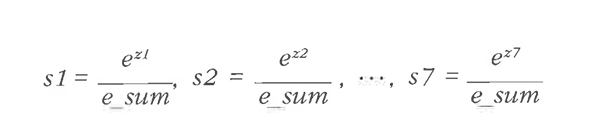

In [34]:
decision = lr.decision_function(test_scaled[:5]) #z값
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [35]:
from scipy.special import softmax
proba = softmax(decision, axis = 1) #각 행에 대해 소프트맥스 계산
print(np.round(proba, decimals = 3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


- axis매개변수를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산한다.

- 로지스틱 회귀는 회귀 모델이 아닌 분류 모델로, 선형 방정식을 사용한다.
- 선형 회귀처럼 계산한 값을 그대로 출력하는 것이 아니라 로지스틱 회귀는 0~1사이로 압축한다.

- 로지스틱 회귀 이진 분류에서는 하나의 선형 방정식을 훈련시켜 시그모이드 함수에 통과시켜서 0~1 사이의 값을 만든다.
- 다중 분류일 경우 클래스 개수만큼 방정식을 훈련시켜, 방정식의 출력값을 소프트맥스 함수에 통과시켜서 전체 클래스에 대한 합이 항상 1이되도록 만든다.

#4-2. 확률적 경사 하강법
: 훈련 세트에서 랜덤하게 샘플 하나씩 꺼내 손실 함수의 경사를 따라 최적의 모델을 찾는 알고리즘이다. 점진적 학습이다.

에포크: 확률적 경사 하강법에서 훈련 세트를 한번 모두 사용하는 과정

- 미니배치 경사 하강법: 여러 개의 샘플을 사용해 경사 하강법을 수행하는 방식
- 배치 경사 하강법: 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용
- 에포크: 확률적 경사 하강법에서 훈련 세트를 한번 모두 사용하는 과정
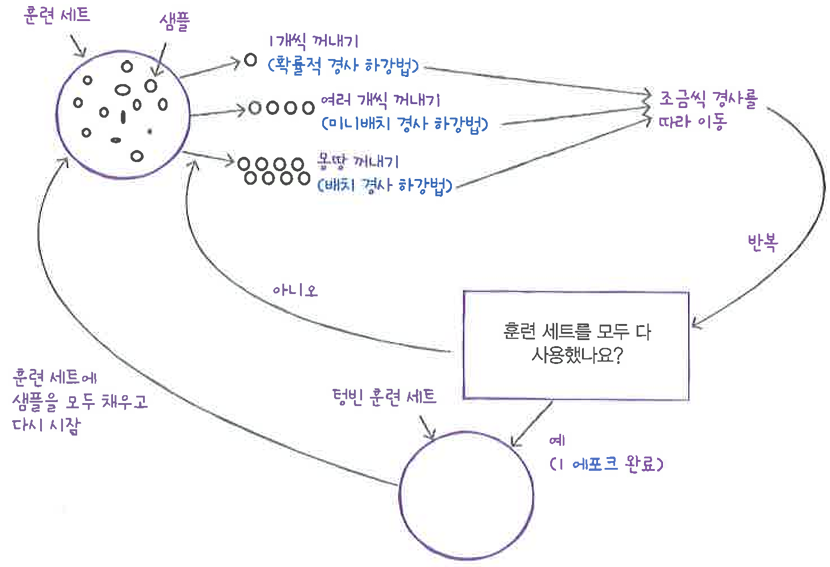

- 손실함수: 확률적 경사 하강법이 최적화할 대상, 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준
- 손실함수는 미분이 가능해야 한다.
- 로지스틱 손실함수(이진 크로스엔트로피 손실 함수): 예측 확률이 1에서 멀어질수록 손실은 아주 큰 양수가 된다., 이진 분류에서 사용
- 크로스엔트로피 손실 함수: 다중 분류에서 사용하는 손실 함수

In [38]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [39]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [40]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [41]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [44]:
from sklearn.linear_model import SGDClassifier #확률적 경사 하강법
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


- log_loss는 손실 함수의 종류를 지정해준다.
- max_iter은 에포크 횟수를 지정한다.

In [45]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


- partial_fit(): 모델을 이어서 훈련할 떼 사용, 호출할 때마다 1에포크씩 이어서 훈련
- 확률적 경사 하강법은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.
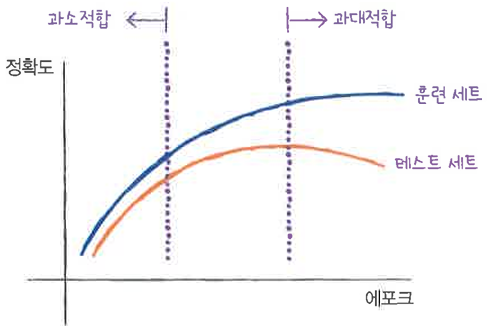
- 조기 종료: 과대적합이 시작하기 전에 훈련을 멈추는 것

In [47]:
import numpy as np
sc = SGDClassifier(loss = 'log_loss', random_state = 42)
train_score=[]
test_score=[]
classes = np.unique(train_target)

In [51]:
for _ in range(0,300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

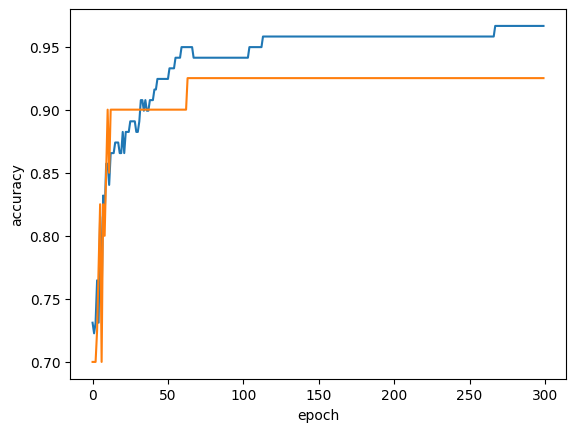

In [52]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [53]:
sc = SGDClassifier(loss='log_loss',max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


- SGDClassifier은 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다.
- 이때, tol 매개변수를 None으로 지정하면 자동으로 멈추지 않고 max_iter=100만큼 무조건 반복한다.

In [56]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


- SGDClassifier의 loss 매개변수 기본값은 'hinge'로, 힌지손실 = 서포트 벡터 머신입니다.